# Comparativa Clasificadores NaiveBayes

Este cuaderno tiene como objetivo comparar diferentes clasificadores Naive Bayes (GaussianNB, MultinomialNB, ComplementNB, BernoulliNB y CategoricalNB) en dos conjuntos de datos distintos: el conjunto de datos Iris y el conjunto de datos Penguins. Entrenaremos cada clasificador, haremos predicciones, evaluaremos su precisión y visualizaremos sus matrices de confusión para comprender su rendimiento.

### Análisis del conjunto de datos Iris

Primero, aplicaremos los clasificadores Naive Bayes al conocido conjunto de datos Iris. Este conjunto de datos se utiliza comúnmente para tareas de clasificación y sirve como un buen punto de partida para demostrar el comportamiento de los modelos.

### Importaciones

En este bloque, importamos todas las bibliotecas necesarias para el análisis. `seaborn` se usa para cargar conjuntos de datos y para visualizaciones, `sklearn.model_selection` para dividir los datos, `sklearn.naive_bayes` para los diferentes clasificadores, `sklearn.metrics` para evaluar el rendimiento del modelo (como la precisión y la matriz de confusión), `matplotlib.pyplot` para graficar, `numpy` para operaciones numéricas, `pandas` para manipulación de datos y `sklearn.utils.multiclass` para manejar etiquetas únicas.

- Importaciones

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels

### Carga y Exploración Inicial de Datos (Iris)

Aquí cargamos el conjunto de datos `iris` directamente desde la biblioteca `seaborn`. El `display(iris)` muestra las primeras filas del DataFrame, permitiéndonos ver la estructura de los datos, incluyendo las características numéricas (sepal_length, sepal_width, petal_length, petal_width) y la variable objetivo categórica (species).

In [ ]:
# Descarga de los datos

iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Separación de Características y Variable Objetivo (Iris)

En este paso, dividimos el conjunto de datos `iris` en características (`X`) y la variable objetivo (`y`). `X` contendrá las medidas de las flores, mientras que `y` contendrá las especies de Iris. Luego, aplicamos `train_test_split` para separar `X` y `y` en conjuntos de entrenamiento (60%) y prueba (40%). El `random_state=1` asegura que la división sea reproducible.

In [ ]:
# Separación de datos I/O

X = iris.drop('species', axis=1)
y = iris['species']

# Separación del Train y Test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

### Instanciación de los Modelos Naive Bayes (Iris)

En este bloque, creamos una instancia de cada uno de los cinco tipos de clasificadores Naive Bayes que vamos a comparar: `GaussianNB`, `MultinomialNB`, `ComplementNB`, `BernoulliNB` y `CategoricalNB`. Cada uno de estos modelos tiene diferentes supuestos sobre la distribución de los datos, lo que los hace adecuados para distintos tipos de características y problemas de clasificación.

- Clasificadores

In [ ]:
# Instancias de los modelos

model_gaussian = GaussianNB()
model_multinomial = MultinomialNB()
madel_complement = ComplementNB()
model_bernoulli = BernoulliNB()
model_categorical = CategoricalNB()

In [ ]:
# Entrenamiento Categórico
model_categorical.fit(x_train, y_train)

CategoricalNB()

In [ ]:
# Entrenamiento Gausiano
model_gaussian.fit(x_train, y_train)

GaussianNB()

In [ ]:
# Entrenamiento Multinomial
model_multinomial.fit(x_train, y_train)

MultinomialNB()

In [ ]:
# Entrenamiento ComplementNB
madel_complement.fit(x_train, y_train)

ComplementNB()

In [ ]:
# Entrenamiento BernoulliNB
model_bernoulli.fit(x_train, y_train)

BernoulliNB()

### Realización de Predicciones (Iris)

Una vez que los modelos han sido entrenados, utilizamos este bloque para realizar predicciones sobre el conjunto de datos de prueba (`x_test`). Cada modelo genera su propio conjunto de predicciones (`y_pred`), que luego utilizaremos para evaluar su rendimiento comparándolas con las etiquetas reales (`y_test`).

In [ ]:
# Predicción con nuevos datos
y_pred_categorical = model_categorical.predict(x_test)
y_pred_gaussian = model_gaussian.predict(x_test)
y_pred_multinomial = model_multinomial.predict(x_test)
y_pred_complement = madel_complement.predict(x_test)
y_pred_bernoulli = model_bernoulli.predict(x_test)

### Evaluación de la Precisión (Iris)

En este bloque, calculamos la `accuracy_score` para cada clasificador Naive Bayes. La precisión mide la proporción de predicciones correctas sobre el total de predicciones. Los resultados se imprimen redondeados a dos decimales, proporcionando una medida inicial del rendimiento de cada modelo en el conjunto de datos Iris.

- Evaluación

In [ ]:
accuracy_categorical = accuracy_score(y_test, y_pred_categorical)
accuracy_gaussian = accuracy_score(y_test, y_pred_gaussian)
accuracy_multinomial = accuracy_score(y_test, y_pred_multinomial)
accuracy_complement = accuracy_score(y_test, y_pred_complement)
accuracy_bernoulli = accuracy_score(y_test, y_pred_bernoulli)
print("Accuracy Categorical:", round(accuracy_categorical, 2))
print("Accuracy Gausiano:", round(accuracy_gaussian, 2))
print("Accuracy Multinomial:", round(accuracy_multinomial, 2))
print("Accuracy Complement:", round(accuracy_complement, 2))
print("Accuracy Bernoulli:", round(accuracy_bernoulli, 2))

Accuracy Categorical: 0.97
Accuracy Gausiano: 0.95
Accuracy Multinomial: 0.93
Accuracy Complement: 0.65
Accuracy Bernoulli: 0.32


### Definición de la Función de Visualización de Matriz de Confusión

Este bloque define la función `visualizacion_matriz_confusion`, una utilidad personalizada para generar y mostrar matrices de confusión. Toma como entrada las etiquetas verdaderas (`y_true`), las etiquetas predichas (`y_pred`), un título opcional y un mapa de colores. La función calcula la matriz de confusión, normaliza los valores y etiqueta los ejes con los nombres de las clases, facilitando la interpretación visual de los resultados de la clasificación.

- Matriz de confusión

In [ ]:
def visualizacion_matriz_confusion(y_true, y_pred, title=None, cmap=plt.cm.Oranges, titleSup=None, ax=None):

    cm = confusion_matrix(y_true, y_pred)
    classes = clases_iris[unique_labels(y_true, y_pred)]

    if ax is None:
        fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' #if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    # fig.tight_layout() # This should be called on the main figure if multiple subplots
    ax.set_title(titleSup, fontsize=12) # Use ax.set_title for subplot title
    return ax

In [ ]:
# Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
ytest_df= y_test.to_frame()
ytest_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)

/tmp/ipython-input-1829786149.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ytest_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
/tmp/ipython-input-1829786149.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ytest_df['species'].replace(['setosa', 'versi

In [ ]:
# Transformamos el resultado de la predicción(array) a un dataframe para transformar los valores categóricos en numéricos
y_model_df_categorical= pd.DataFrame(y_pred_categorical, columns = ['species'])
y_model_df_categorical['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
# Y volvemos a transformar el dataframe a un array, que es el tipo de dato que espera la función plot_confusion_matrix()
y_model_array_categorical = y_model_df_categorical['species'].to_numpy()

/tmp/ipython-input-1417197902.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  y_model_df_categorical['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
/tmp/ipython-input-1417197902.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_model_df_categorical['species

In [ ]:
y_model_df_gaussian= pd.DataFrame(y_pred_gaussian, columns = ['species'])
y_model_df_gaussian['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
y_model_array_gaussian = y_model_df_gaussian['species'].to_numpy()

/tmp/ipython-input-2971649517.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  y_model_df_gaussian['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
/tmp/ipython-input-2971649517.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_model_df_gaussian['species'].rep

In [ ]:
y_model_df_multinomial = pd.DataFrame(y_pred_multinomial, columns = ['species'])
y_model_df_multinomial['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
y_model_array_multinomial = y_model_df_multinomial['species'].to_numpy()

/tmp/ipython-input-3712158091.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  y_model_df_multinomial['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
/tmp/ipython-input-3712158091.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_model_df_multinomial['species

In [ ]:
y_model_df_complement = pd.DataFrame(y_pred_complement, columns = ['species'])
y_model_df_complement['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
y_model_array_complement = y_model_df_complement['species'].to_numpy()

/tmp/ipython-input-632660594.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  y_model_df_complement['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
/tmp/ipython-input-632660594.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_model_df_complement['species'].r

In [ ]:
y_model_df_bernoulli = pd.DataFrame(y_pred_bernoulli, columns = ['species'])
y_model_df_bernoulli['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
y_model_array_bernoulli = y_model_df_bernoulli['species'].to_numpy()

/tmp/ipython-input-3507823909.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  y_model_df_bernoulli['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
/tmp/ipython-input-3507823909.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_model_df_bernoulli['species'].r

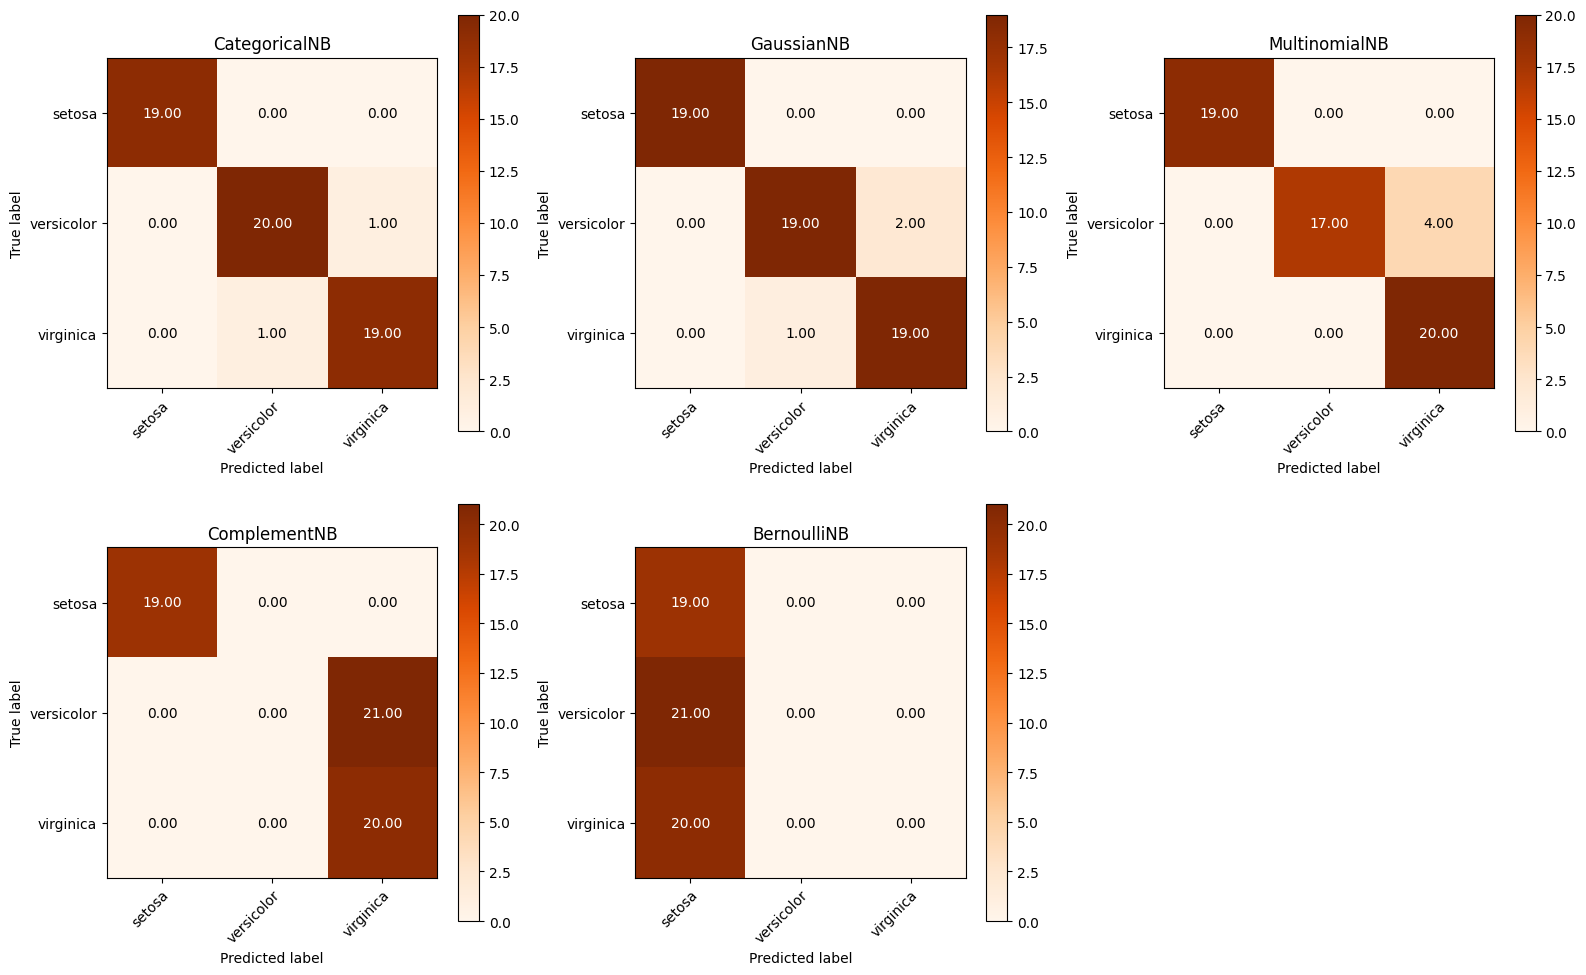

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten() # Flatten the 2x3 array of axes for easy iteration

# Creamos este array porque es el parámetro con las clases que espera la función
clases_iris = np.array(['setosa', 'versicolor', 'virginica'])

visualizacion_matriz_confusion(ytest_df['species'], y_model_array_categorical, title='Normalized confusion matrix', titleSup='CategoricalNB', ax=axes[0])
visualizacion_matriz_confusion(ytest_df['species'], y_model_array_gaussian, title='Normalized confusion matrix', titleSup='GaussianNB', ax=axes[1])
visualizacion_matriz_confusion(ytest_df['species'], y_model_array_multinomial, title='Normalized confusion matrix', titleSup='MultinomialNB', ax=axes[2])
visualizacion_matriz_confusion(ytest_df['species'], y_model_array_complement, title='Normalized confusion matrix', titleSup='ComplementNB', ax=axes[3])
visualizacion_matriz_confusion(ytest_df['species'], y_model_array_bernoulli, title='Normalized confusion matrix', titleSup='BernoulliNB', ax=axes[4])

# Hide the last empty subplot if there are an odd number of plots
if len(axes) > 5:
    fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

### Análisis del conjunto de datos Penguins

A continuación, utilizaremos el conjunto de datos Penguins, que presenta un escenario ligeramente más complejo con características categóricas y numéricas, y algunos valores faltantes. Esto nos permitirá observar cómo los clasificadores manejan los diferentes tipos de datos y los pasos de preprocesamiento.

### Carga y Exploración Inicial de Datos (Penguins)

De manera similar al conjunto de datos Iris, cargamos el conjunto de datos `penguins` usando `seaborn`. El `display(pinguinos)` nos permite inspeccionar las primeras filas. Este conjunto de datos es más complejo, ya que incluye características numéricas y categóricas, y presenta valores faltantes, lo que requiere pasos adicionales de preprocesamiento.

In [ ]:
# Descarga de los datos

pinguinos = sns.load_dataset('penguins')
pinguinos

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Separación de Características y Variable Objetivo (Penguins)

Aquí, separamos las características (`X`) y la variable objetivo (`y`) del conjunto de datos `pinguinos`. La variable objetivo es `species` (la especie de pingüino). Luego, dividimos los datos en conjuntos de entrenamiento (60%) y prueba (40%) utilizando `train_test_split`, con un `random_state=1` para asegurar la reproducibilidad.

In [ ]:
# Separación de datos I/O

X = pinguinos.drop('species', axis=1)
y = pinguinos['species']

# Separación del Train y Test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

### Instanciación de los Modelos Naive Bayes (Penguins)

Al igual que con el conjunto de datos Iris, en este bloque se instancian los cinco tipos de clasificadores Naive Bayes: `GaussianNB`, `MultinomialNB`, `ComplementNB`, `BernoulliNB` y `CategoricalNB`. Estos modelos se entrenarán y evaluarán en el conjunto de datos preprocesado de los pingüinos.

- Clasificadores

In [ ]:
# Instancias de los modelos

model_gaussian = GaussianNB()
model_multinomial = MultinomialNB()
madel_complement = ComplementNB()
model_bernoulli = BernoulliNB()
model_categorical = CategoricalNB()

In [ ]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

# Entrenamiento Categórico

# Make copies to preprocess without affecting other models if they need original data
x_train_processed = x_train.copy()
x_test_processed = x_test.copy()

# 1. Handle NaN values
# Impute numerical columns with their mean
for col in x_train_processed.select_dtypes(include=np.number).columns:
    if x_train_processed[col].isnull().any():
        mean_val = x_train_processed[col].mean()
        x_train_processed[col] = x_train_processed[col].fillna(mean_val)
        # Use the mean from the training set to impute the test set
        x_test_processed[col] = x_test_processed[col].fillna(mean_val)

# Impute categorical columns with their mode
for col in x_train_processed.select_dtypes(include=['object', 'category']).columns:
    if x_train_processed[col].isnull().any():
        mode_val = x_train_processed[col].mode()[0] # mode() returns a Series, take the first element
        x_train_processed[col] = x_train_processed[col].fillna(mode_val)
        # Use the mode from the training set to impute the test set
        x_test_processed[col] = x_test_processed[col].fillna(mode_val)

# 2. Encode categorical features
categorical_cols = x_train_processed.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) # handle unknown categories in test set
    # Fit encoder on training data and transform both train and test data
    x_train_processed[categorical_cols] = encoder.fit_transform(x_train_processed[categorical_cols])
    x_test_processed[categorical_cols] = encoder.transform(x_test_processed[categorical_cols])

# Now fit the model with the preprocessed data
model_categorical.fit(x_train_processed, y_train)

CategoricalNB()

In [ ]:
# Entrenamiento Gausiano
model_gaussian.fit(x_train_processed, y_train)

GaussianNB()

In [ ]:
# Entrenamiento Multinomial
model_multinomial.fit(x_train_processed, y_train)

MultinomialNB()

In [ ]:
# Entrenamiento ComplementNB
madel_complement.fit(x_train_processed, y_train)

ComplementNB()

In [ ]:
# Entrenamiento BernoulliNB
model_bernoulli.fit(x_train_processed, y_train)

BernoulliNB()

### Realización de Predicciones (Penguins)

Después de entrenar los modelos con los datos preprocesados de los pingüinos, este bloque se encarga de generar las predicciones sobre el conjunto de prueba (`x_test_processed`). Es importante destacar la corrección aplicada para `CategoricalNB`, donde se ajustan los valores de `x_test_processed` para que estén dentro del rango de categorías observadas durante el entrenamiento, evitando errores debido a la interpretación de valores numéricos continuos como categorías discretas por este modelo específico.

In [ ]:
# Predicción con nuevos datos

# IMPORTANT: The CategoricalNB model (model_categorical) was trained on both
# numerical and categorical features in the previous cell. CategoricalNB
# is designed for discrete categorical features, and feeding it continuous
# numerical data causes issues like the IndexError.
# The ideal fix would be to retrain CategoricalNB in cell fNSLp5nk0P7y
# using only the genuinely categorical features (e.g., 'island', 'sex').
#
# This workaround clips the test data to prevent IndexError from out-of-bounds
# numerical values being treated as categories by CategoricalNB.

x_test_processed_clipped_categorical = x_test_processed.copy()

for i, col_name in enumerate(x_test_processed_clipped_categorical.columns):
    # Check if the model has feature_log_prob_ for this column index
    if i < len(model_categorical.feature_log_prob_):
        max_category_index = model_categorical.feature_log_prob_[i].shape[1] - 1
        # Clip values to be within the range [0, max_category_index]
        x_test_processed_clipped_categorical[col_name] = x_test_processed_clipped_categorical[col_name].clip(lower=0, upper=max_category_index)

y_pred_categorical = model_categorical.predict(x_test_processed_clipped_categorical)
y_pred_gaussian = model_gaussian.predict(x_test_processed)
y_pred_multinomial = model_multinomial.predict(x_test_processed)
y_pred_complement = madel_complement.predict(x_test_processed)
y_pred_bernoulli = model_bernoulli.predict(x_test_processed)

### Evaluación de la Precisión (Penguins)

En este bloque, calculamos y mostramos la `accuracy_score` para cada clasificador Naive Bayes aplicado al conjunto de datos de los pingüinos. La precisión proporciona una métrica de rendimiento que indica la proporción de predicciones correctas realizadas por cada modelo. Los resultados se redondean a dos decimales para facilitar la comparación.

- Evaluación

In [ ]:
accuracy_categorical = accuracy_score(y_test, y_pred_categorical)
accuracy_gaussian = accuracy_score(y_test, y_pred_gaussian)
accuracy_multinomial = accuracy_score(y_test, y_pred_multinomial)
accuracy_complement = accuracy_score(y_test, y_pred_complement)
accuracy_bernoulli = accuracy_score(y_test, y_pred_bernoulli)
print("Accuracy Categorical:", round(accuracy_categorical, 2))
print("Accuracy Gausiano:", round(accuracy_gaussian, 2))
print("Accuracy Multinomial:", round(accuracy_multinomial, 2))
print("Accuracy Complement:", round(accuracy_complement, 2))
print("Accuracy Bernoulli:", round(accuracy_bernoulli, 2))

Accuracy Categorical: 0.93
Accuracy Gausiano: 0.96
Accuracy Multinomial: 0.79
Accuracy Complement: 0.69
Accuracy Bernoulli: 0.66


- Matriz de confusión

### Definición de la Función de Visualización de Matriz de Confusión (para Penguins)

Este bloque define la misma función `visualizacion_matriz_confusion` utilizada para el conjunto de datos Iris, pero adaptada para ser usada con los pingüinos. Esta función es clave para visualizar el rendimiento de clasificación de cada modelo, permitiendo identificar errores específicos y el rendimiento por clase a través de la matriz de confusión generada.

In [ ]:
def visualizacion_matriz_confusion(y_true, y_pred, title=None, cmap=plt.cm.Blues, titleSup=None, ax=None):

    cm = confusion_matrix(y_true, y_pred)
    classes = clases_iris[unique_labels(y_true, y_pred)]

    if ax is None:
        fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' #if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    # fig.tight_layout() # This should be called on the main figure if multiple subplots
    ax.set_title(titleSup, fontsize=12) # Use ax.set_title for subplot title
    return ax

In [ ]:
# Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
ytest_df= y_test.to_frame()
ytest_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)

/tmp/ipython-input-1829786149.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ytest_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)


In [ ]:
# Transformamos el resultado de la predicción(array) a un dataframe para transformar los valores categóricos en numéricos
y_model_df_categorical= pd.DataFrame(y_pred_categorical, columns = ['species'])
y_model_df_categorical['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
# Y volvemos a transformar el dataframe a un array, que es el tipo de dato que espera la función plot_confusion_matrix()
y_model_array_categorical = y_model_df_categorical['species'].to_numpy()

/tmp/ipython-input-1417197902.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  y_model_df_categorical['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)


In [ ]:
y_model_df_gaussian= pd.DataFrame(y_pred_gaussian, columns = ['species'])
y_model_df_gaussian['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
y_model_array_gaussian = y_model_df_gaussian['species'].to_numpy()

/tmp/ipython-input-2971649517.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  y_model_df_gaussian['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)


In [ ]:
y_model_df_multinomial = pd.DataFrame(y_pred_multinomial, columns = ['species'])
y_model_df_multinomial['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
y_model_array_multinomial = y_model_df_multinomial['species'].to_numpy()

/tmp/ipython-input-3712158091.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  y_model_df_multinomial['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)


In [ ]:
y_model_df_complement = pd.DataFrame(y_pred_complement, columns = ['species'])
y_model_df_complement['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
y_model_array_complement = y_model_df_complement['species'].to_numpy()

/tmp/ipython-input-632660594.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  y_model_df_complement['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)


In [ ]:
y_model_df_bernoulli = pd.DataFrame(y_pred_bernoulli, columns = ['species'])
y_model_df_bernoulli['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
y_model_array_bernoulli = y_model_df_bernoulli['species'].to_numpy()

/tmp/ipython-input-3507823909.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  y_model_df_bernoulli['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)


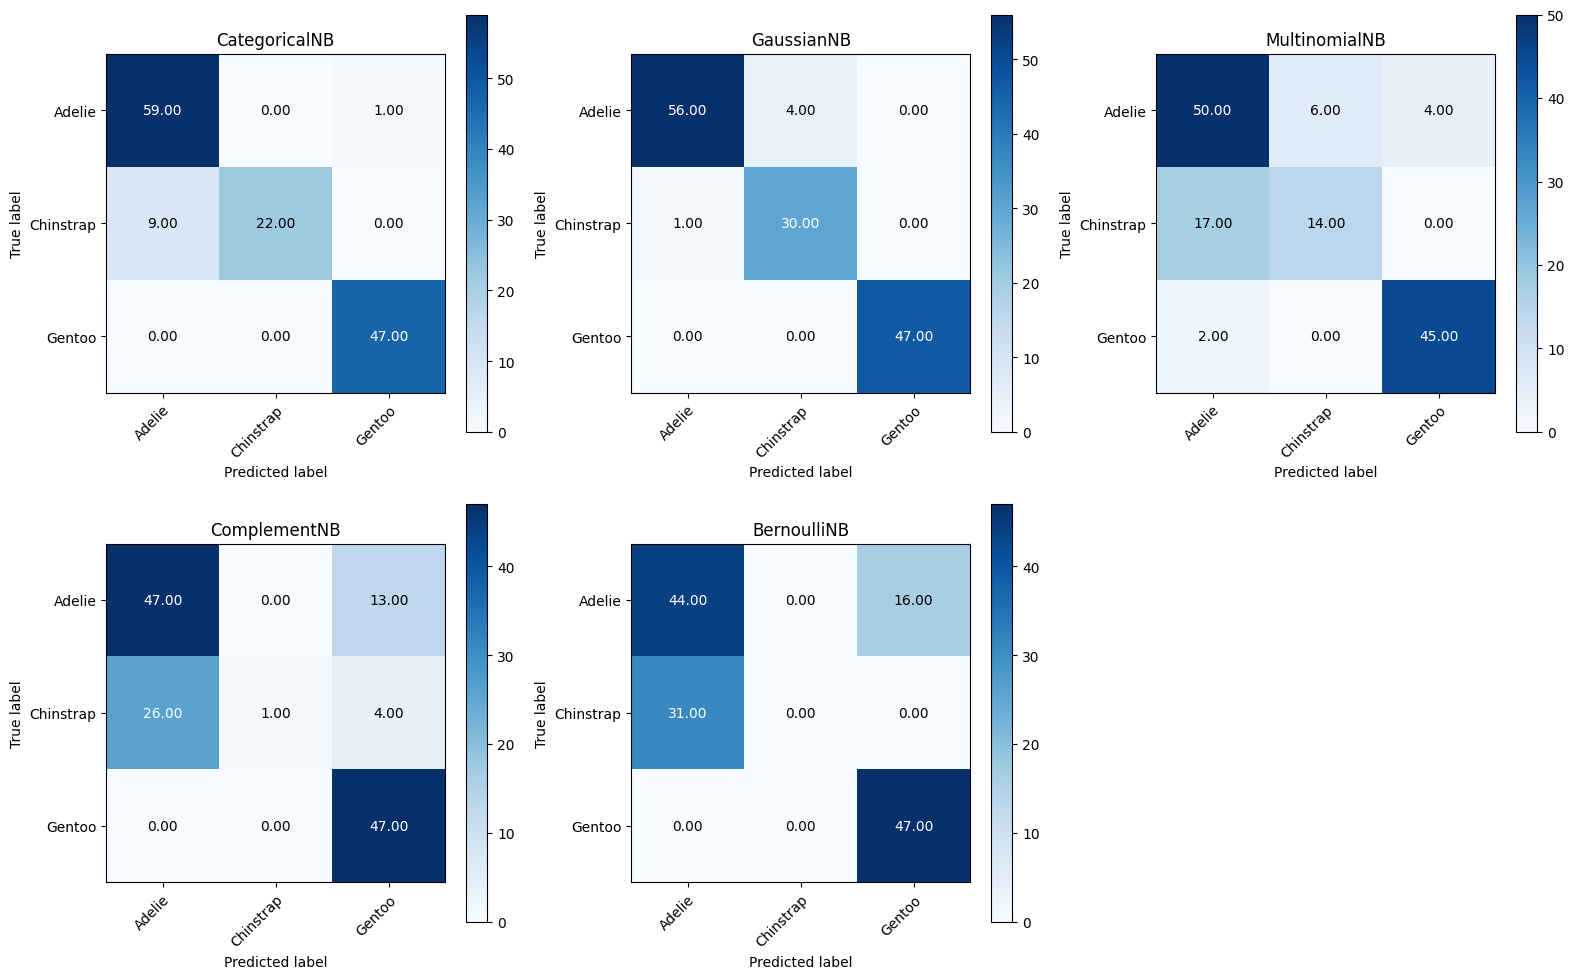

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten() # Flatten the 2x3 array of axes for easy iteration

# Define penguin species and their numerical mapping
penguin_species = np.array(['Adelie', 'Chinstrap', 'Gentoo'])
species_to_int_map = {species: i for i, species in enumerate(penguin_species)}

# Update clases_iris to penguin species for this plot (it's a misleading variable name here)
clases_iris = penguin_species # This variable is used inside visualizacion_matriz_confusion

# Convert y_test to numerical representation
y_test_numeric = y_test.map(species_to_int_map).to_numpy()

# Convert each y_pred array to numerical representation
y_pred_categorical_numeric = pd.Series(y_pred_categorical).map(species_to_int_map).to_numpy()
y_pred_gaussian_numeric = pd.Series(y_pred_gaussian).map(species_to_int_map).to_numpy()
y_pred_multinomial_numeric = pd.Series(y_pred_multinomial).map(species_to_int_map).to_numpy()
y_pred_complement_numeric = pd.Series(y_pred_complement).map(species_to_int_map).to_numpy()
y_pred_bernoulli_numeric = pd.Series(y_pred_bernoulli).map(species_to_int_map).to_numpy()

visualizacion_matriz_confusion(y_test_numeric, y_pred_categorical_numeric, title='Normalized confusion matrix', titleSup='CategoricalNB', ax=axes[0])
visualizacion_matriz_confusion(y_test_numeric, y_pred_gaussian_numeric, title='Normalized confusion matrix', titleSup='GaussianNB', ax=axes[1])
visualizacion_matriz_confusion(y_test_numeric, y_pred_multinomial_numeric, title='Normalized confusion matrix', titleSup='MultinomialNB', ax=axes[2])
visualizacion_matriz_confusion(y_test_numeric, y_pred_complement_numeric, title='Normalized confusion matrix', titleSup='ComplementNB', ax=axes[3])
visualizacion_matriz_confusion(y_test_numeric, y_pred_bernoulli_numeric, title='Normalized confusion matrix', titleSup='BernoulliNB', ax=axes[4])

# Hide the last empty subplot if there are an odd number of plots
if len(axes) > 5:
    fig.delaxes(axes[5])

plt.tight_layout()
plt.show()